In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import math
%matplotlib inline

In [53]:
# Сгенерируем выборку
N = 100
X = sps.norm.rvs(size=N, loc=0, scale=1)

Оценка максимального правдоподобия для $N(\theta, 1)$: $\overline X$

Сопряженное априорное распределение для $N(\theta, 1)$: $N(\alpha, \beta^2)$

Соответственно Байесовская оценка: $E(\theta |X) = \frac{\alpha + \beta^2 \sum_{x \in X}{x}}{n\beta^2 + 1}$

In [54]:
# Функции оценок
def likehoodEstimation(X):
    return np.mean(X)

def bayesEstimation(X, a, var):
    return (a + var * var * np.sum(X)) / (len(X) * var * var + 1.0)

In [55]:
params = [[0.0, 1.0], [0.0, 100.0], [10.0, 1.0], [10.0, 100.0]]

# Для префиксов выборки посчитаем отклонение оценки от реального значения
def fillEstimation(X, expected, estimation):
    result = np.zeros(len(X))
    for n in range(1, len(X) + 1):
        result[n - 1] = abs(estimation(X[:n]) - expected)
    return result

In [56]:
# Построение графиков
def showGraph(X, params, expected, scale):
    x = np.arange(1, len(X) + 1)

    plt.figure(figsize=(9, 5))
    plt.plot(x, fillEstimation(X, expected, likehoodEstimation), label='Likehood')
    for param in params:
        y = fillEstimation(X, expected, lambda X: bayesEstimation(X, param[0], param[1]))
        plt.plot(x, y, \
                 label='Bayes with $\\alpha =' + str(param[0]) + ', \\beta = ' + str(param[1]) + '$')

    plt.legend(loc='best')
    plt.ylim((0, scale))
    plt.xlabel('n')
    plt.ylabel('$|\\theta - estimation|$')
    plt.show()

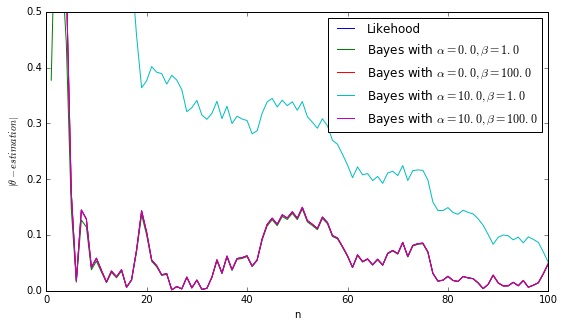

In [57]:
showGraph(X, params, 0, 0.5)

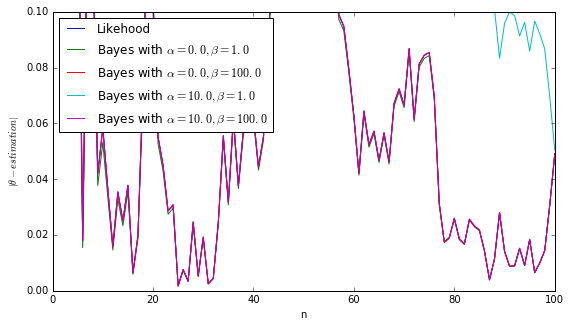

In [58]:
showGraph(X, params, 0, 0.1)

Как видим, все оценки, кроме Байесовской с параметрами 10, 1 (которая нестабильно себя ведет, в зависимости от выборки может быть как хуже, так и лучше остальных) практически идентичны.

Оценка максимального правдоподобия для $N(0, \theta)$: $\overline {X^2}$

Сопряженное априорное распределение для $N(0, \theta)$: $\Gamma_{inv}(\alpha + \frac{n}{2}, \beta + \frac{\sum_{x \in X}x^2}{2})$

Соответственно Байесовская оценка: $E(\theta |X) = \frac{\beta + \frac{\sum_{x \in X}x^2}{2}}{\alpha + \frac{n}{2} - 1}$

In [59]:
# Функции оценок
def likehoodEstimation(X):
    return np.mean(X ** 2.0)

def bayesEstimation(X, a, b):
    return (b + np.sum(X ** 2.0) / 2.0) / (a + len(X) / 2.0 - 1)

In [60]:
params = [[1.0, 1.0], [1.0, 100.0], [10.0, 1.0], [10.0, 100.0]]

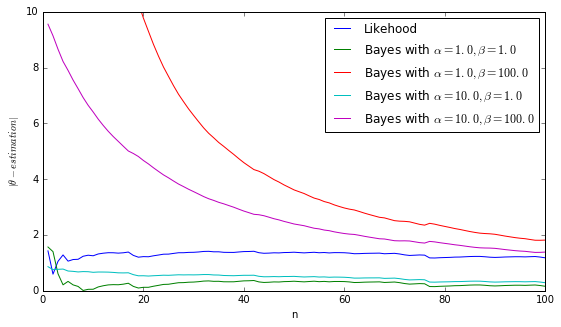

In [61]:
showGraph(X, params, 1, 10)

В данном случае самые годные Байесовские оценки с параметрами $\alpha = 1, \beta = 1$ и $\alpha = 10, \beta = 1$